Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – Cardano–Tartaglia formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including expalnataions. plots, solution code and test cases



Primer paso:


Definir:
$$ Δ_0=b^2 -3ac $$

$$ Δ_1=2b^3 -9bc+27d $$

Segundo paso:

Definir:

$$C=\sqrt[3]{\frac{Δ_1 \pm \sqrt{Δ_1^2-4Δ_0^3}}{2}}$$

Si $$Δ_0=0,  Δ_1=0$$ entonces todas las raices serán de la forma:

$$\frac{-b}{3a}$$



En caso contrario:

$$x_1=-\frac{1}{3a}(b+C+\frac{Δ_0}{C}$$

$$x_2=-\frac{1}{3a}(b+C\frac{-1+\sqrt{-3}}{2}+\frac{Δ_0}{C\frac{-1+\sqrt{-3}}{2}}$$

$$x_3=-\frac{1}{3a}(b+C(\frac{-1+\sqrt{-3}}{2})^2+\frac{Δ_0}{C(\frac{-1+\sqrt{-3}}{2})^2}$$

In [ ]:
def cubic(b, c, d, x):
    v = x**3 + b*x**2 + c*x + d
    return v


In [ ]:
import cmath
import math

def solve_cubic(b, c, d):

    p = b**2-3*c
    q = 2*b**3-9*b*c+27*d
    C_1 = ((q + cmath.sqrt(q**2 - 4*p**3))/2)**(1/3)
    C_2 = ((q - cmath.sqrt(q**2 - 4*p**3))/2)**(1/3)
    l = (-1 + cmath.sqrt(-3))/2
    if p == 0 and q == 0:
      x1 = -b/3
      x2 = -b/3
      x3 = -b/3
    elif C_1 == 0:
      x1 = -(1/3) * (b + l**0*C_2 + p/(l**0*C_2))
      x2 = -(1/3) * (b + l**1*C_2 + p/(l**1*C_2))
      x3 = -(1/3) * (b + l**2*C_2 + p/(l**2*C_2))
    else:
      x1 = -(1/3) * (b + l**0*C_1 + p/(l**0*C_1))
      x2 = -(1/3) * (b + l**1*C_1 + p/(l**1*C_1))
      x3 = -(1/3) * (b + l**2*C_1 + p/(l**2*C_1))

    return [x1,x2,x3]

<ipython-input-7-f3e99b899132>:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


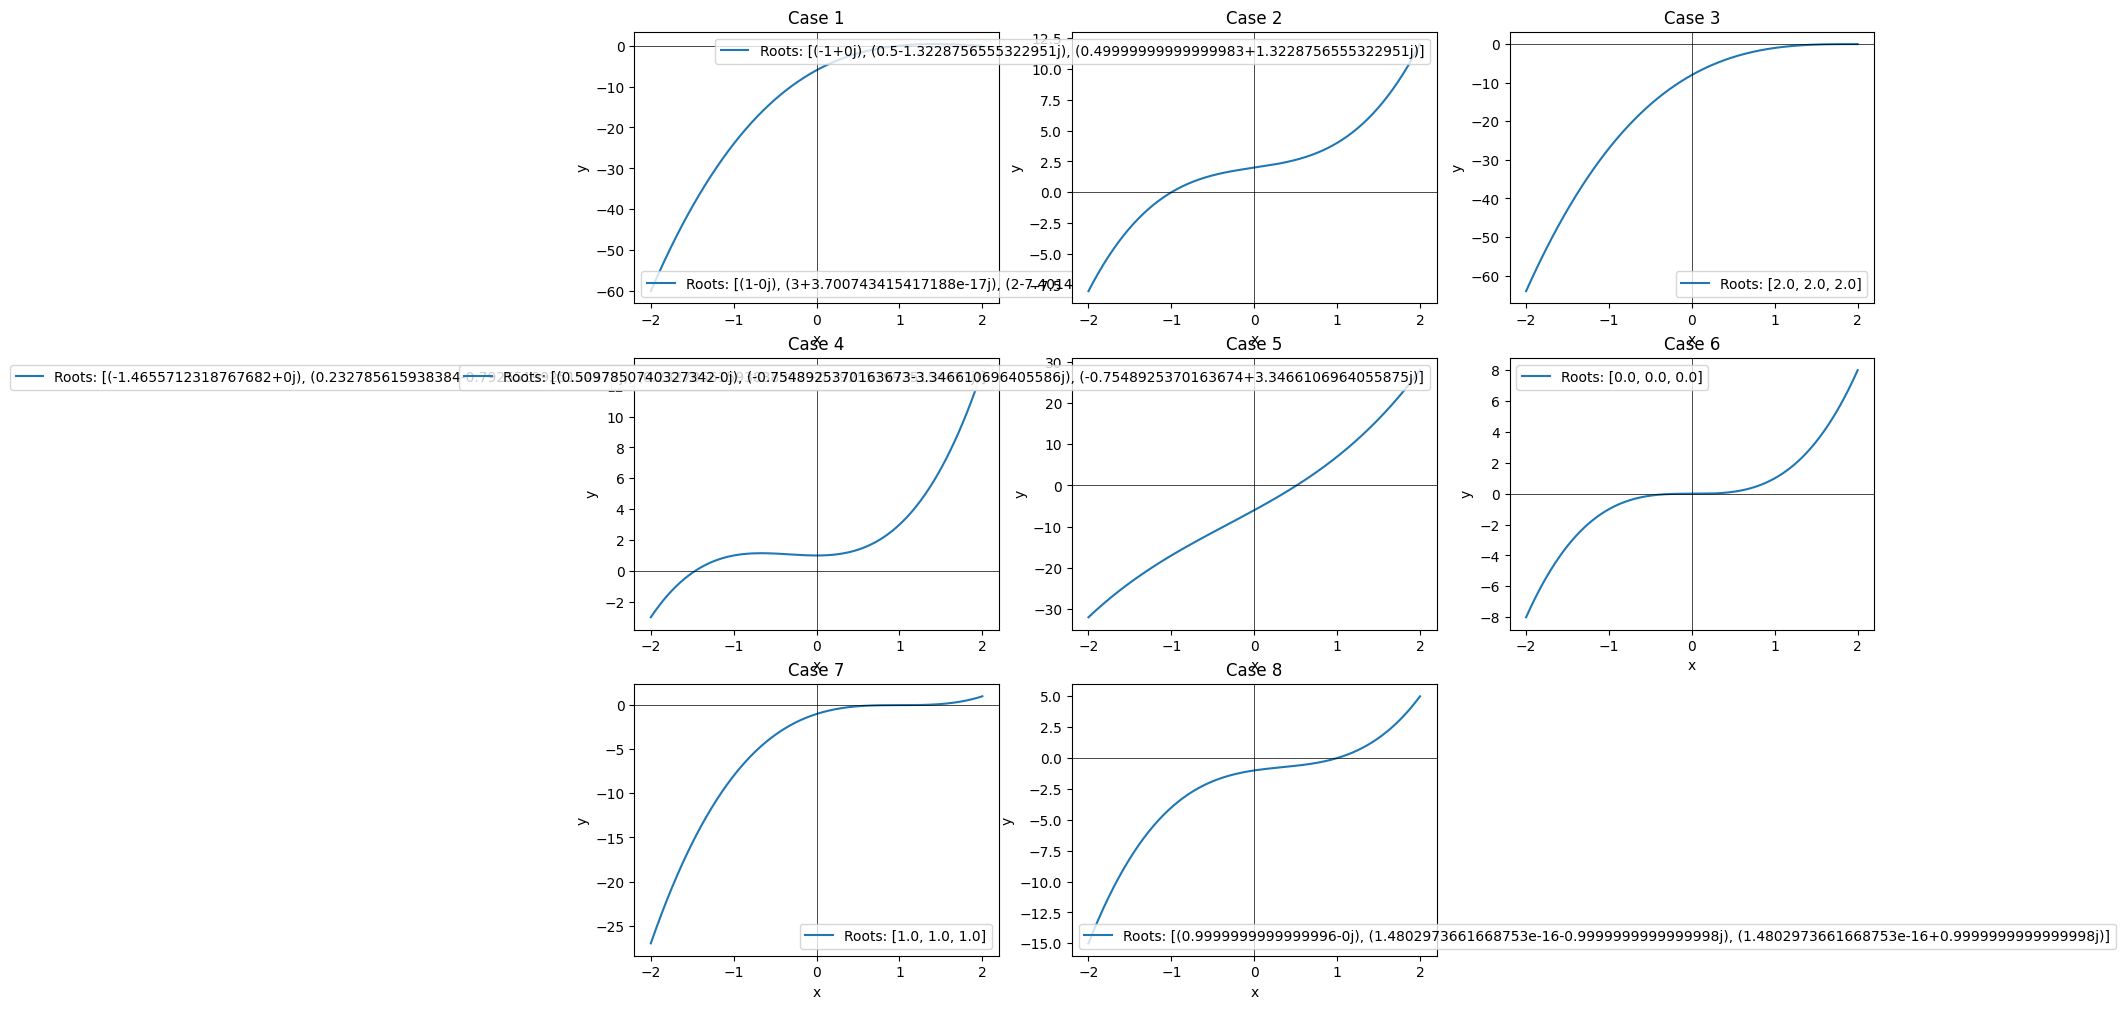

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 400)

cases = [
    (-6, 11, -6),
    (0, 1, 2),
    (-6, 12, -8),
    (1, 0, 1),
    (1, 11, -6),
    (0, 0, 0),
    (-3, 3, -1),
    (-1, 1, -1)
]

plt.figure(figsize=(16, 12))
plt.rc('font', size=10)

for i, (b, c, d) in enumerate(cases):
    plt.subplot(3, 3, i + 1)
    roots = solve_cubic(b, c, d)
    y = cubic(b, c, d, x)
    plt.plot(x, y, label=f'Roots: {roots}')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Case {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

Bulit test cases that include

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$

$$ (x-2)^3 -x +2 = x^3 -6x^2 + 11x - 6 $$

$$ (x+1)x^2+1 = x^3+x^2+1 $$

$$ (x+1)(x {)x^3 + x +2$$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:0,1,2**

In [ ]:
from numpy import allclose

variants = [
    {'b': 0, 'c': 0, 'd': -1},
    {'b':  3, 'c': 0, 'd':-4},
    {'b': -6, 'c': 11, 'd': -6},              # Case 1: Three real different roots
    {'b': 0, 'c': 1, 'd': 2},                 # Case 2: Last digits
    {'b': -6, 'c': 12, 'd': -8},              # Case 3: Root of multiplicity two
    {'b': 1, 'c': 0, 'd': 1},                 # Case 4: Complex roots with small b
    {'b': 0, 'c': 0, 'd': 0},                 # Case 5: x**3
    {'b': -3, 'c': 3, 'd': -1},               # Case 6: x**3 -3*x**2 + 3*x -1
    {'b': -1, 'c': 1, 'd': -1}                # Case 7: x**3 - x**2 + x - 1
]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))


True
True
True
True
True
True
True
True
True


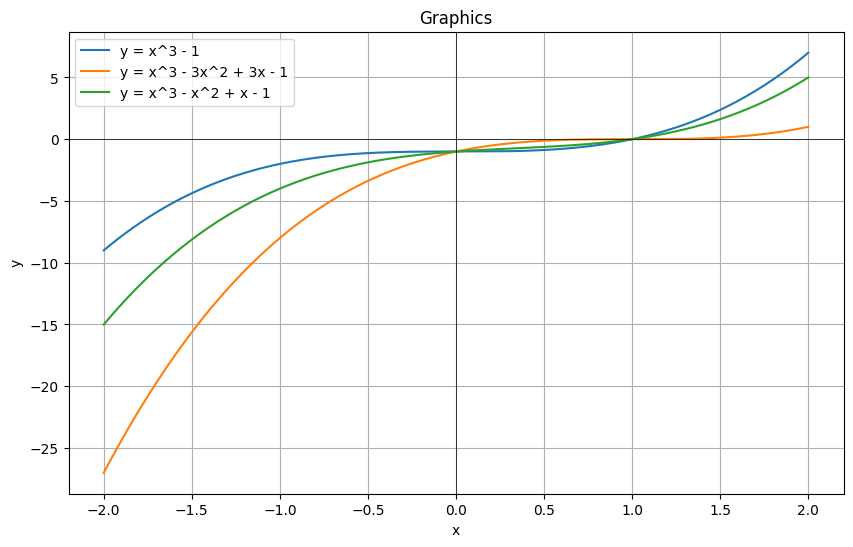

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-2, 2, 400)

y1 = x**3 - 1
y2 = x**3 - 3*x**2 + 3*x - 1
y3 = x**3 - x**2 + x - 1

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='y = x^3 - 1')
plt.plot(x, y2, label='y = x^3 - 3x^2 + 3x - 1')
plt.plot(x, y3, label='y = x^3 - x^2 + x - 1')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.title('Graphics')

plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()


 Publisth the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.